# Problem Description

This notebook will guide you through implementation of **multivariate linear regression** to to solve the **polynomial regression** problem:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3 + \theta_4 x^4
= \boldsymbol{\theta}^T \mathbf{x}
$$

$$
\boldsymbol{\theta} = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\end{bmatrix}, 
\qquad
\mathbf{x} = \begin{bmatrix}1 \\ x \\ x^2 \\ x^3 \\ x^4\end{bmatrix}
$$

Below, you will

1. Implement the cost function for multivarate linear regression
1. Implement the normal equations method to solve a multivariate linear regression problem
1. Implement gradient descent for multivariate linear regression
1. Experiment with feature normalization to improve the convergence of gradient descent


## Imports
Run this code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

## Helper functions
Run this code to set up the helper functions. The function ``feature_expansion`` accepts an vector of $n$ scalar x values and returns an $n \times 5$ data matrix by applying the feature expansion $x \mapsto [1, x, x^2, x^3, x^4]$ to each scalar $x$ value.

In [2]:
def feature_expansion(x, deg):
    if x.ndim > 1:
        raise ValueError('x should be a 1-dimensional array')
    m = x.shape
    x_powers = [x**k for k in range(0,deg+1)]
    X = np.stack( x_powers, axis=1 )

    return X

def plot_model(X_test, theta):
    '''
    Note: uses globals x, y, x_test, which are assigned below
    when the dataset is created. Don't overwrite these variables.
    '''
    y_test = np.dot(X_test, theta)
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
    plt.legend(['Test', 'Train'])

## (2 points) List comprehensions

Read about list comprehensions. Explain what is happening in the line of code

```python
x_powers = [x**k for k in range(0,deg+1)]
```

the horizontal vector "x_powers" is made up of values in the range x^k for k bound 0 to deg+1
For example; x_powers = [x**0, x**k1, x**k2, x**k3, ... x**k(deg+1)]

## Create a data set for polynomial regression

Read and run the code below. This generates data from a fourth-degree polynomial and then uses feature expansion to set up the problem of learning the polynomial as multivariate linear regression

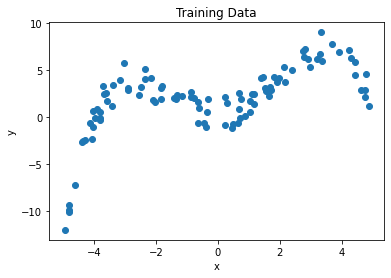

In [3]:
# Set random seed
np.random.seed(0)

# Create random set of m training x values between -5 and 5
m = 100
x = np.random.rand(m)*10 - 5   

# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)
m_test  = len(x_test);

# Feature expansion for training and test x values
deg = 4
X      = feature_expansion(x, deg)
X_test = feature_expansion(x_test, deg)

n = deg + 1   # total number of features including the '1' feature

# Define parameters (theta) and generate y values
theta = 0.1*np.array([1, 1, 10, 0.5, -0.5]);
y = np.dot(X, theta) + np.random.randn(m)   # polynomial plus noise

# Plot the training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## (2 points) Implement the cost function
Complete the code below to implement the cost function for multivariate linear regression.

In [4]:
def cost_function(X, y, theta):  
    '''
    Compute the cost function for a particular data set and 
    hypothesis (parameter vector)
    
    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        theta   parameters (length n vector)
    Output:
        cost    the value of the cost function (scalar)
    '''
    
    # TODO: write correct code to compute the cost function
    h_x = np.dot(X, theta)
    cost = 1/2 * np.sum(np.square(h_x-y))
    return cost

## Test the cost function
Run this to test your cost function.

In [5]:
np.random.seed(1)

theta_random = np.random.rand(n)
theta_zeros  = np.zeros(n)
theta_ones   = np.ones(n)

print( "Cost function (random): %.2f" % cost_function(X, y, theta_random))  # prints 54523.64
print( "Cost function  (zeros): %.2f" % cost_function(X, y, theta_zeros))   # prints 845.65
print( "Cost function   (ones): %.2f" % cost_function(X, y, theta_ones))    # prints 2524681.08

Cost function (random): 54523.64
Cost function  (zeros): 845.65
Cost function   (ones): 2524681.08


## (6 points) Implement first training algorithm: normal equations

In [6]:
def normal_equations(X, y):
    '''
    Train a linear regression model using the normal equations

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
    Output:
        theta   parameters (length n vector)

    '''
    # TODO: write correct code to find theta using the normal equations
    m, n = X.shape
    theta = np.zeros(n)
    xTx = np.linalg.inv(np.dot(X.transpose(), X))
    
    theta = np.dot(np.dot(xTx, X.transpose()), y)
    return theta

## Use normal equations to fit the model
Run this code to test your implementation of the normal equations. If it runs properly you will see a curve that fits the data well. Note the value of the cost function for ``theta_normal_equations``.

Cost function: 48.54


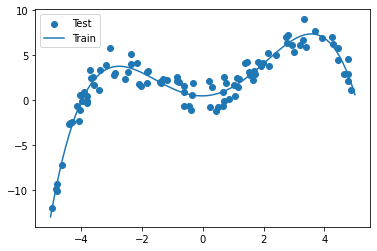

In [7]:
theta_normal_equations = normal_equations(X, y)
plot_model(X_test, theta_normal_equations)
print ("Cost function: %.2f" % cost_function(X, y, theta_normal_equations))

## (6 points) Implement second training algorithm: (vectorized) gradient descent

Implement gradient descent for multivariate linear regression. Make sure your solution is vectorized.

In [8]:
def gradient_descent( X, y, alpha, iters, theta=None ):
    '''
    Train a linear regression model by gradient descent

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        alpha   step size
        iters   number of iterations
        theta   initial parameter values (length n vector; optional)
    
    Output:
        theta      learned parameters (length n vector)
        J_history  trace of cost function value in each iteration

    '''
    m,n = X.shape
    
    if theta is None:
        theta = np.zeros(n)
    
    # For recording cost function value during gradient descent
    J_history = np.zeros(iters)

    for i in range(0, iters):
        
        # TODO: compute gradient (vectorized) and update theta
        # print("\nX: \n", X.shape) # (100, 5)
        # print("\ny: \n", y.shape) # (100, )
        # print("\ntheta: \n", theta.shape) # (5, )
        h_x = np.dot(X, theta) # (100, )
        # dif = (h_x-y) # (100, )
        d_theta = np.dot(h_x-y, X)
        
        theta = theta - alpha * d_theta
        '''print("d_theta: ", d_theta)
        print("h_x: ", h_x)
        print("theta: ", theta)'''
        # Record cost function
        J_history[i] = cost_function(X, y, theta)
        if math.isclose(J_history[i], 48.54):
            print("\n\n: ", i, "\n\n")
        
    return theta, J_history

## (4 points) Use gradient descent to train the model
* Write code to call your ``gradient_descent`` method to learn parameter
* Plot the model fit (use ``plot_model``)
* Plot the cost function vs. iteration to help assess convergence
* Print the final value of the cost function
* Experiment with different step sizes and numbers of iterations until you can find a good hypothesis. Try to match the cost function value from ``normal_equations`` to two decimal places. How many iterations does this take?



:  265844 




:  265845 




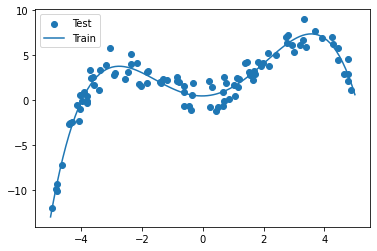

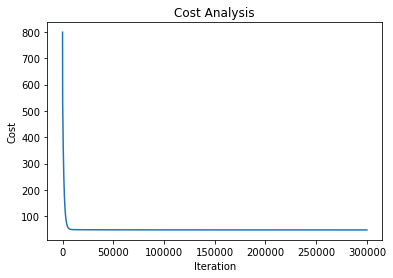

Cost:  48.538655544459715


In [9]:
def plot_cost(cost_history):
    plt.figure(2)
    plt.plot(cost_history)
    plt.title('Cost Analysis')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# TODO: write code
iters = 300000
alpha = 0.0000004
theta, J_history = gradient_descent(X, y, alpha, iters)
plot_model(X_test, theta)
plot_cost(J_history)
print("Cost: ", J_history[-1])

# Takes 265844 iterations with a step size of 0.0000004

## (10 points) Gradient descent with feature normalization
You should have observed
that it takes many iterations of gradient descent to match the cost
function value achieved by the normal equations. Now
you will implement feature normalization to improve the convergence
of gradient descent. Remember that the formula
for feature normalization is:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - \mu_j}{\sigma_j}$$

Here are some guidelines for the implementation:

* The same transformation should be applied to train and test data.

* The values $\mu_j$ and $\sigma_j$ are the mean and standard deviation of
the $j$th column (i.e., feature) in the **training data**. (Hint:
there are numpy functions to compute these.)

* Do not normalize the column of all ones. (Optional question: why?)

* Use broadcasting to do the normalization--don't write for loops

After normalizing both the training data and test data, follow the same steps as above to experiment with gradient descent using the *normalized* training and test data: print the value of the cost function, and create the same plots. Tune the step size and number of iterations again to make gradient descent converge as quickly as possible. How many iterations does it take to match the cost function value from ``normal_equations`` to two decimal places?  




:  186681 




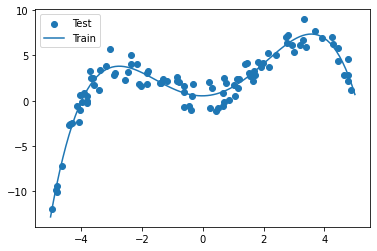

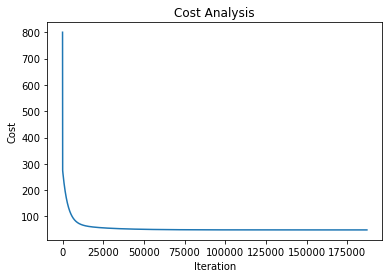

48.539960757217465


In [10]:
# TODO: your code for gradient descent with feature normalization
alpha = 0.004
iters = 187000
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_norm = (X-np.mean(X))/np.std(X)
# print(X_norm)
# print(X_test_norm)
theta, J_history = gradient_descent(X_norm, y, alpha, iters)
plot_model(X_test_norm, theta)
plot_cost(J_history)
print(J_history[-1])

** *Write answer here: how many iterations?* **
186681 iterations to achieve same cost value with alpha = 0.004

# Extra Credit
Put solutions to extra credit problems here.